In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

import sys
sys.path.append("../")

# Package for importing image representation
from PIL import Image, ImageOps

# from src.V1_reconst import generate_Y, reconstruct
import pandas as pd
import seaborn as sns
import time
import os.path
from src.compress_sensing_library import *
from src.utility_library import *

In [2]:
img_nm = 'peppers'
root = search_root()
load_V1 = '{root}/result/dct/{img}/V1/color_param_Sat_Jul_22_05_25_33_2023_hyper_sweep.csv'.format(root = root, img = img_nm)
load_pixel = '{root}/result/dct/{img}/pixel/color_param_Fri_May_12_16_46_28_2023.csv'.format(root = root, img = img_nm)
load_gaussian = '{root}/result/dct/{img}/gaussian/color_param_Fri_May_12_16_46_08_2023.csv'.format(root = root, img = img_nm)
directory = "num_cell_error"
save = True
data = [load_pixel, load_gaussian, load_V1]

In [3]:
V1_param_df = pd.read_csv(load_V1)

for index in V1_param_df.columns:
    if (index == 'Unnamed: 0') :
        V1_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [4]:
V1_param_df

rep    alp  num_cell  cell_size  sparse_freq       error
0       0   0.01        50          2            2  136.371784
1       0   0.01        50          2            4  154.157271
2       0   0.01        50          2            8  164.970250
3       0   0.01        50          4            2  141.084105
4       0   0.01        50          4            4  153.754152
...   ...    ...       ...        ...          ...         ...
2155   19  10.00       500          4            4   16.058266
2156   19  10.00       500          4            8   18.590521
2157   19  10.00       500          8            2   13.663095
2158   19  10.00       500          8            4   16.880920
2159   19  10.00       500          8            8   20.865452

[2160 rows x 6 columns]

In [5]:
V1_param_df.loc[V1_param_df['num_cell'] == 50]

rep    alp  num_cell  cell_size  sparse_freq       error
0       0   0.01        50          2            2  136.371784
1       0   0.01        50          2            4  154.157271
2       0   0.01        50          2            8  164.970250
3       0   0.01        50          4            2  141.084105
4       0   0.01        50          4            4  153.754152
...   ...    ...       ...        ...          ...         ...
2137   19  10.00        50          4            4   21.689012
2138   19  10.00        50          4            8   21.818743
2139   19  10.00        50          8            2   24.883312
2140   19  10.00        50          8            4   20.256698
2141   19  10.00        50          8            8   22.169639

[720 rows x 6 columns]

In [6]:
V1_param_df.loc[(V1_param_df['num_cell'] == 50) & (V1_param_df['alp'] == 0.1) & (V1_param_df['cell_size'] == 8) & (V1_param_df['sparse_freq'] == 4)]

rep  alp  num_cell  cell_size  sparse_freq       error
34      0  0.1        50          8            4  109.617392
142     1  0.1        50          8            4  109.933059
250     2  0.1        50          8            4  108.734309
358     3  0.1        50          8            4  109.545913
466     4  0.1        50          8            4  110.525568
574     5  0.1        50          8            4  109.787624
682     6  0.1        50          8            4  109.699243
790     7  0.1        50          8            4  108.785086
898     8  0.1        50          8            4  110.227786
1006    9  0.1        50          8            4  110.552187
1114   10  0.1        50          8            4  109.892576
1222   11  0.1        50          8            4  110.447868
1330   12  0.1        50          8            4  111.333355
1438   13  0.1        50          8            4  109.664367
1546   14  0.1        50          8            4  109.832393
1654   15  0.1        50          8            4  108.619942
1762   16  0.1        50          8            4  110.252078
1870   17  0.1        50          8            4  110.389298
1978   18  0.1        50          8            4  110.926436
2086   19  0.1        50          8            4  109.141340

In [7]:
temp = V1_param_df.loc[(V1_param_df['num_cell'] == 50) & (V1_param_df['alp'] == 0.01) & (V1_param_df['cell_size'] == 8) & (V1_param_df['sparse_freq'] == 4)]

temp2 = V1_param_df.groupby(
    ['num_cell', 'cell_size', 'sparse_freq', 'alp'], as_index=False).mean().drop('rep', axis=1) 
temp2.loc[(temp2['num_cell'] == 50) & (temp2['alp'] == 0.1) & (temp2['cell_size'] == 8) & (temp2['sparse_freq'] == 4)]

num_cell  cell_size  sparse_freq  alp       error
29        50          8            4  0.1  109.895391

In [13]:
temp3 = V1_param_df.loc[V1_param_df['num_cell'] == 500]

# temp3.loc[(temp3['error'] == temp3['error'].min())]
temp50 = temp3.groupby(
    ['num_cell', 'cell_size', 'sparse_freq', 'alp'], as_index=False).mean().drop('rep', axis=1)
num_cell, cell_size, sparse_freq, alpha, error = temp50.loc[(temp50['error'] == temp50['error'].min())].values.squeeze()
num_cell = int(num_cell)
cell_size = int(cell_size)
sparse_freq = int(sparse_freq)

In [14]:
temp3.groupby(
    ['num_cell', 'sparse_freq', 'cell_size', 'alp'], as_index=False).mean().drop('rep', axis=1)

num_cell  sparse_freq  cell_size    alp       error
0        200            2          2   0.01  109.513638
1        200            2          2   0.10   32.148014
2        200            2          2   1.00   13.583399
3        200            2          2  10.00   14.559377
4        200            2          4   0.01  110.271468
5        200            2          4   0.10   22.544659
6        200            2          4   1.00   12.598685
7        200            2          4  10.00   14.255985
8        200            2          8   0.01  117.883074
9        200            2          8   0.10   16.317043
10       200            2          8   1.00   12.536567
11       200            2          8  10.00   14.351376
12       200            4          2   0.01  132.801315
13       200            4          2   0.10   27.497842
14       200            4          2   1.00   14.030541
15       200            4          2  10.00   15.390643
16       200            4          4   0.01  110.969954
17       200            4          4   0.10   13.687300
18       200            4          4   1.00   14.688634
19       200            4          4  10.00   16.412890
20       200            4          8   0.01  130.893202
21       200            4          8   0.10   12.551109
22       200            4          8   1.00   14.972147
23       200            4          8  10.00   17.115421
24       200            8          2   0.01  143.077772
25       200            8          2   0.10   27.895114
26       200            8          2   1.00   14.832679
27       200            8          2  10.00   16.185475
28       200            8          4   0.01  127.282899
29       200            8          4   0.10   15.963407
30       200            8          4   1.00   16.969278
31       200            8          4  10.00   18.867923
32       200            8          8   0.01  131.298228
33       200            8          8   0.10   14.025515
34       200            8          8   1.00   17.363715
35       200            8          8  10.00   21.013239

In [10]:
print('minimum parameter')
temp50.loc[(temp50['error'] == temp50['error'].min())]

minimum parameter


num_cell  cell_size  sparse_freq   alp     error
24       500          8            2  0.01  8.222598

In [11]:
V1_param_df.loc[(V1_param_df['num_cell'] == num_cell) & (V1_param_df['sparse_freq'] == sparse_freq) & (V1_param_df['cell_size'] == cell_size) & (V1_param_df['alp'] == alpha)]

rep   alp  num_cell  cell_size  sparse_freq     error
24      0  0.01       500          8            2  8.044429
132     1  0.01       500          8            2  8.113163
240     2  0.01       500          8            2  8.049979
348     3  0.01       500          8            2  8.054155
456     4  0.01       500          8            2  9.424748
564     5  0.01       500          8            2  8.052604
672     6  0.01       500          8            2  8.057094
780     7  0.01       500          8            2  8.640048
888     8  0.01       500          8            2  8.063225
996     9  0.01       500          8            2  8.052322
1104   10  0.01       500          8            2  8.396215
1212   11  0.01       500          8            2  8.059486
1320   12  0.01       500          8            2  8.324357
1428   13  0.01       500          8            2  8.053441
1536   14  0.01       500          8            2  8.056079
1644   15  0.01       500          8            2  8.415082
1752   16  0.01       500          8            2  8.207259
1860   17  0.01       500          8            2  8.053858
1968   18  0.01       500          8            2  8.062980
2076   19  0.01       500          8            2  8.271434

Process Reconstruction on (540, 540, 3) image


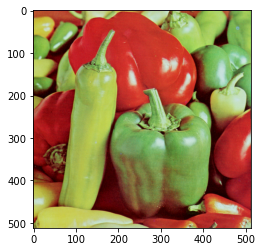

8.27346101492763
Process Reconstruction on (540, 540, 3) image


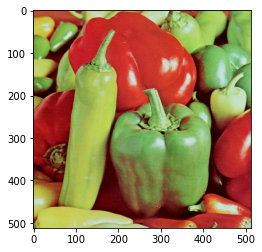

8.071752872052652
Process Reconstruction on (540, 540, 3) image


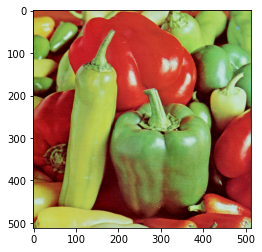

8.052233406303486
Process Reconstruction on (540, 540, 3) image


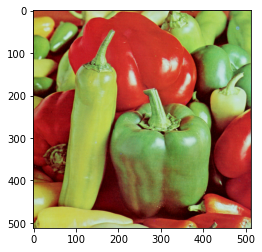

8.074716464990596
Process Reconstruction on (540, 540, 3) image


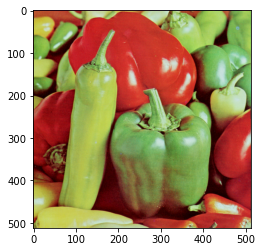

8.051446242171414
Process Reconstruction on (540, 540, 3) image


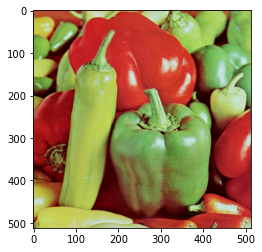

8.153895714308849
Process Reconstruction on (540, 540, 3) image


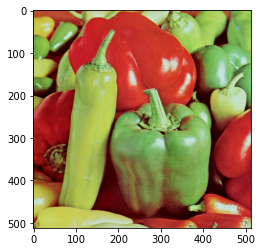

8.055052637062023
Process Reconstruction on (540, 540, 3) image


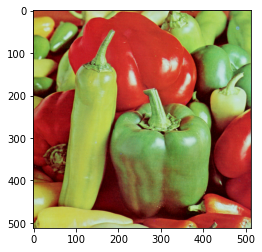

8.36186668837528
Process Reconstruction on (540, 540, 3) image


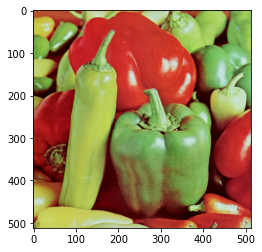

8.056411691823136
Process Reconstruction on (540, 540, 3) image


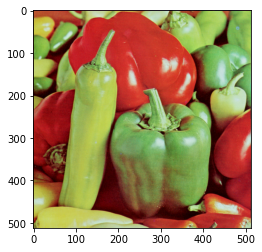

8.043022344557958
Process Reconstruction on (540, 540, 3) image


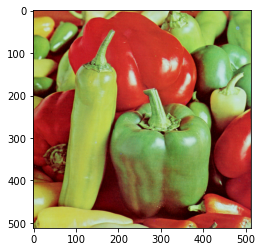

8.049819555688835
Process Reconstruction on (540, 540, 3) image


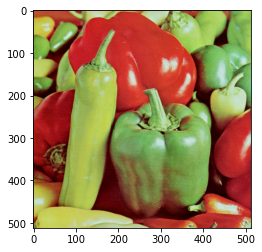

8.085581306315284
Process Reconstruction on (540, 540, 3) image


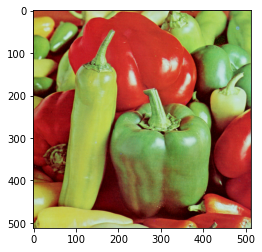

8.531474239769901
Process Reconstruction on (540, 540, 3) image


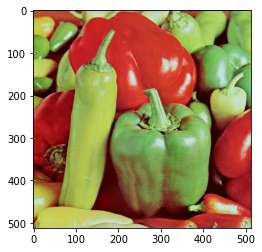

8.062151760890202
Process Reconstruction on (540, 540, 3) image


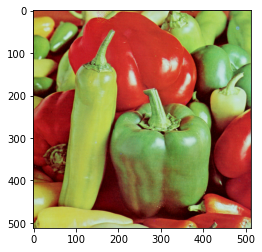

8.817720855205287
Process Reconstruction on (540, 540, 3) image


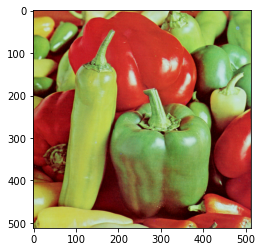

8.0493475513359
Process Reconstruction on (540, 540, 3) image


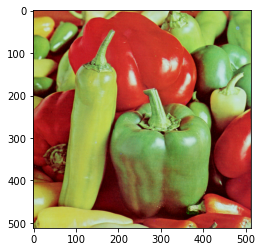

8.99285202156076
Process Reconstruction on (540, 540, 3) image


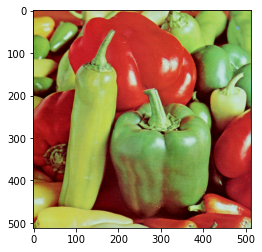

8.054413991552362
Process Reconstruction on (540, 540, 3) image


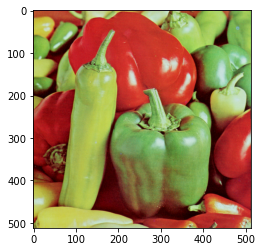

8.430433464807193
Process Reconstruction on (540, 540, 3) image


KeyboardInterrupt: 

In [12]:
root = search_root()
img = Image.open(os.path.join(root, "image/peppers.png"))
img_arr = np.asarray(img)
rep = 20
avg = 0
result=[]
for i in range(0, 20):
    reconst = filter_reconstruct(img_arr, num_cell=num_cell, cell_size = cell_size, sparse_freq=sparse_freq, alpha = alpha, observation = 'V1', mode = 'color')
#     reconst = filter_reconstruct(img_arr, num_cell=50, cell_size = 1, sparse_freq=1, alpha = 0.001, observation = 'V1', mode = 'color')
    error = error_calculation(img_arr, reconst)
    plt.imshow(reconst)
    plt.show()
    print(error)
    avg+=error
    result.append(error)
print(avg/20)


In [139]:
pd.DataFrame(result, columns=['error'])

error
0   33.538353
1   34.284707
2   33.934578
3   33.956623
4   34.184987
5   33.913730
6   34.158031
7   34.334628
8   34.066699
9   34.121841
10  34.129459
11  34.404473
12  33.579772
13  34.000310
14  34.618251
15  34.082677
16  33.725098
17  33.970804
18  33.873507
19  34.733765

In [119]:
error

34.11475348208387

In [120]:
V1_param_df.loc[(V1_param_df['num_cell'] == num_cell) & (V1_param_df['cell_size'] == cell_size) & (V1_param_df['sparse_freq'] == sparse_freq) & (V1_param_df['alp'] == alpha)].groupby(['alp', 'num_cell', 'cell_size', 'sparse_freq']).mean()

rep      error
alp num_cell cell_size sparse_freq                
1.0 200      6         2            9.5  34.114753

In [15]:
temp3 = V1_param_df.loc[V1_param_df['num_cell'] == 200]
avg = temp3.groupby(
    ['num_cell', 'sparse_freq', 'cell_size', 'alp'], as_index=False).mean().drop('rep', axis=1)
avg

num_cell  sparse_freq  cell_size    alp       error
0        200            2          2   0.01  109.513638
1        200            2          2   0.10   32.148014
2        200            2          2   1.00   13.583399
3        200            2          2  10.00   14.559377
4        200            2          4   0.01  110.271468
5        200            2          4   0.10   22.544659
6        200            2          4   1.00   12.598685
7        200            2          4  10.00   14.255985
8        200            2          8   0.01  117.883074
9        200            2          8   0.10   16.317043
10       200            2          8   1.00   12.536567
11       200            2          8  10.00   14.351376
12       200            4          2   0.01  132.801315
13       200            4          2   0.10   27.497842
14       200            4          2   1.00   14.030541
15       200            4          2  10.00   15.390643
16       200            4          4   0.01  110.969954
17       200            4          4   0.10   13.687300
18       200            4          4   1.00   14.688634
19       200            4          4  10.00   16.412890
20       200            4          8   0.01  130.893202
21       200            4          8   0.10   12.551109
22       200            4          8   1.00   14.972147
23       200            4          8  10.00   17.115421
24       200            8          2   0.01  143.077772
25       200            8          2   0.10   27.895114
26       200            8          2   1.00   14.832679
27       200            8          2  10.00   16.185475
28       200            8          4   0.01  127.282899
29       200            8          4   0.10   15.963407
30       200            8          4   1.00   16.969278
31       200            8          4  10.00   18.867923
32       200            8          8   0.01  131.298228
33       200            8          8   0.10   14.025515
34       200            8          8   1.00   17.363715
35       200            8          8  10.00   21.013239

Process Reconstruction on (540, 540, 3) image


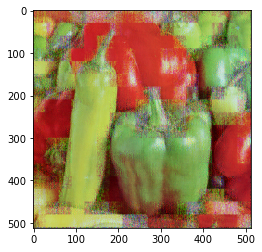

data error: 109.51363773540838
reconst error: 109.18454672493847
Process Reconstruction on (540, 540, 3) image


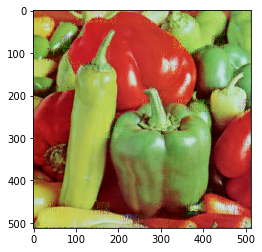

data error: 32.14801375287591
reconst error: 33.8024719372685
Process Reconstruction on (540, 540, 3) image


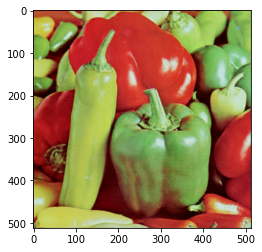

data error: 13.58339917140105
reconst error: 13.489268099171221
Process Reconstruction on (540, 540, 3) image


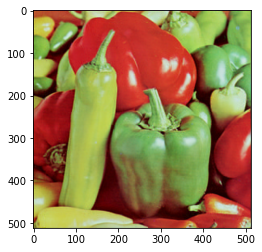

data error: 14.559376886954462
reconst error: 14.58510357966111
Process Reconstruction on (540, 540, 3) image


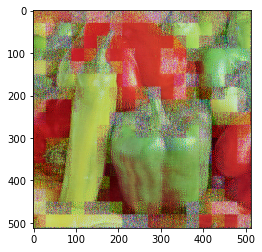

data error: 110.27146795423134
reconst error: 131.32869042905122
Process Reconstruction on (540, 540, 3) image


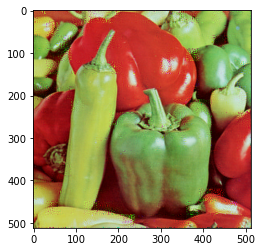

data error: 22.544658825948368
reconst error: 27.40318728376913
Process Reconstruction on (540, 540, 3) image


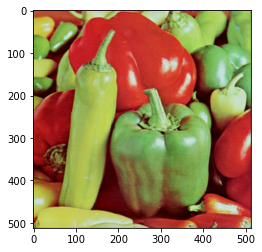

data error: 12.598685357899019
reconst error: 14.239570414889135
Process Reconstruction on (540, 540, 3) image


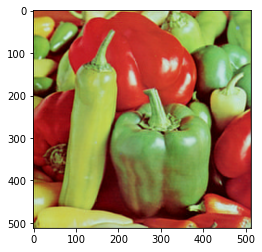

data error: 14.255984523693675
reconst error: 15.33355958744029
Process Reconstruction on (540, 540, 3) image


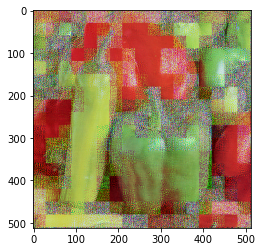

data error: 117.88307440273476
reconst error: 143.21982408420865
Process Reconstruction on (540, 540, 3) image


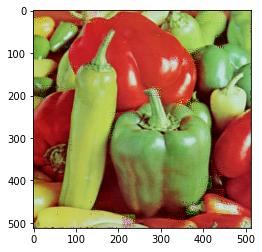

data error: 16.317043309180427
reconst error: 28.6933847014004
Process Reconstruction on (540, 540, 3) image


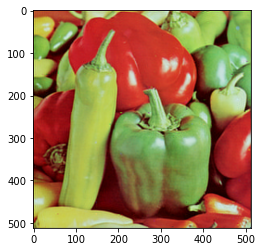

data error: 12.536567244287506
reconst error: 14.899848251082071
Process Reconstruction on (540, 540, 3) image


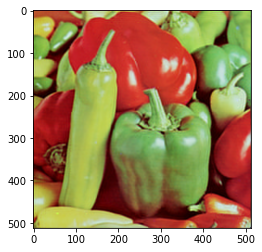

data error: 14.351376223611922
reconst error: 16.165554414746584
Process Reconstruction on (540, 540, 3) image


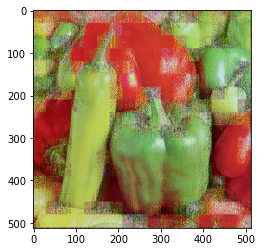

data error: 132.8013153702142
reconst error: 110.57285406560409
Process Reconstruction on (540, 540, 3) image


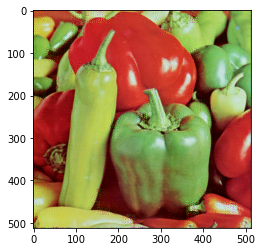

data error: 27.49784216474969
reconst error: 21.707902880871554
Process Reconstruction on (540, 540, 3) image


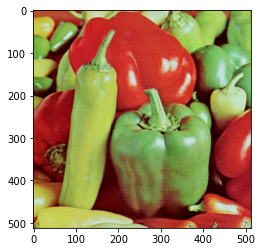

data error: 14.030541376457686
reconst error: 12.615369541774712
Process Reconstruction on (540, 540, 3) image


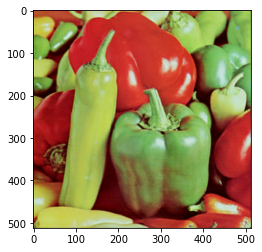

data error: 15.390642981895088
reconst error: 14.303308459008187
Process Reconstruction on (540, 540, 3) image


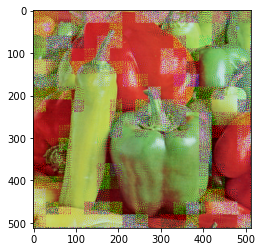

data error: 110.96995443218763
reconst error: 110.92008996309855
Process Reconstruction on (540, 540, 3) image


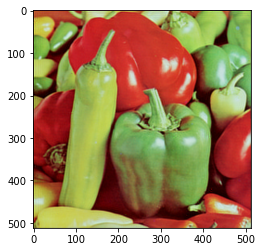

data error: 13.687299991486743
reconst error: 13.728854340322894
Process Reconstruction on (540, 540, 3) image


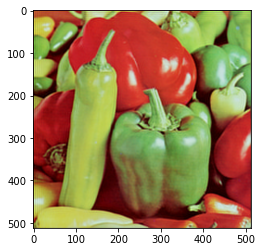

data error: 14.688633816513496
reconst error: 14.684398437273472
Process Reconstruction on (540, 540, 3) image


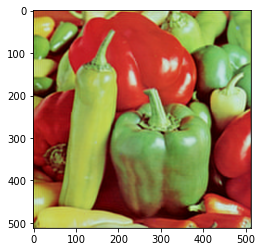

data error: 16.412889771312628
reconst error: 16.39970095757245
Process Reconstruction on (540, 540, 3) image


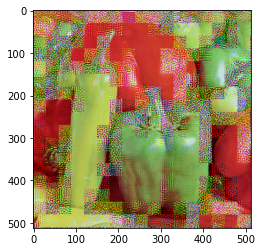

data error: 130.8932017081527
reconst error: 126.42262030412337
Process Reconstruction on (540, 540, 3) image


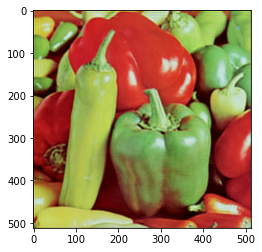

data error: 12.551108938154709
reconst error: 15.868949758467558
Process Reconstruction on (540, 540, 3) image


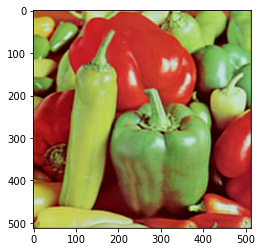

data error: 14.972147135847527
reconst error: 16.978700646243976
Process Reconstruction on (540, 540, 3) image


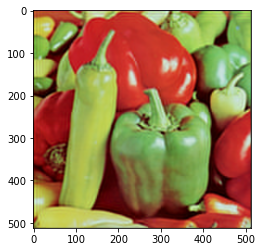

data error: 17.115420736029805
reconst error: 18.850359565685086
Process Reconstruction on (540, 540, 3) image


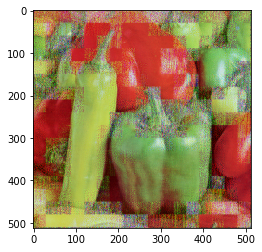

data error: 143.077772069868
reconst error: 117.50779290836654
Process Reconstruction on (540, 540, 3) image


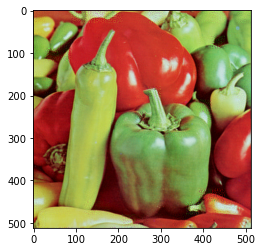

data error: 27.895114337402283
reconst error: 16.449057573494972
Process Reconstruction on (540, 540, 3) image


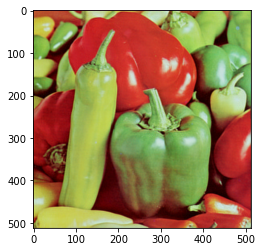

data error: 14.83267882125564
reconst error: 12.563889156227878
Process Reconstruction on (540, 540, 3) image


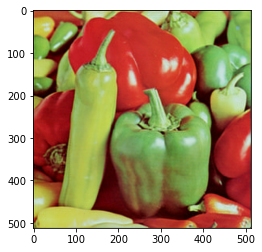

data error: 16.18547510691972
reconst error: 14.369040672013716
Process Reconstruction on (540, 540, 3) image


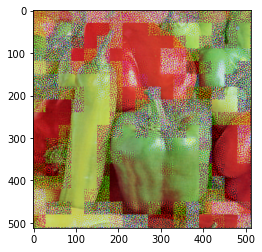

data error: 127.28289924057697
reconst error: 130.43763324198844
Process Reconstruction on (540, 540, 3) image


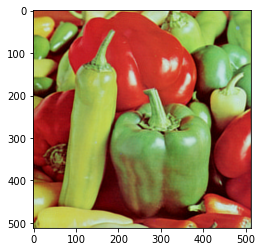

data error: 15.963407003554599
reconst error: 12.577956526676457
Process Reconstruction on (540, 540, 3) image


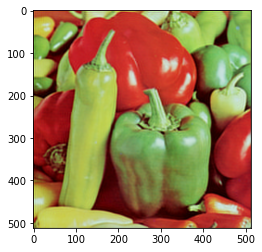

data error: 16.969278145575622
reconst error: 14.99065718560882
Process Reconstruction on (540, 540, 3) image


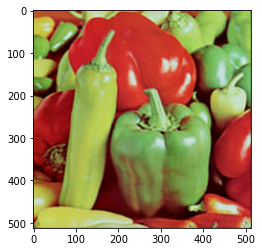

data error: 18.867923371065437
reconst error: 17.113515302411113
Process Reconstruction on (540, 540, 3) image


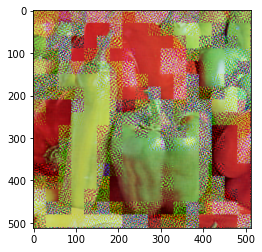

data error: 131.29822822943345
reconst error: 130.7046791727588
Process Reconstruction on (540, 540, 3) image


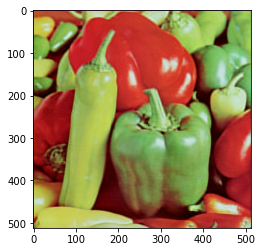

data error: 14.025514970178676
reconst error: 14.044699563017705
Process Reconstruction on (540, 540, 3) image


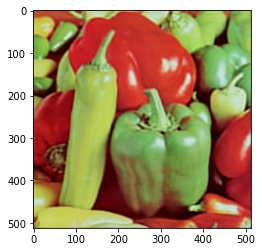

data error: 17.363714780925903
reconst error: 17.346411478470696
Process Reconstruction on (540, 540, 3) image


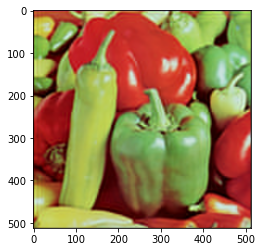

data error: 21.013239071069663
reconst error: 21.025787687118157


In [24]:
for num_cell, cell_size, sparse_freq, alpha, data_error in avg.values:
    num_cell = int(num_cell)
    cell_size = int(cell_size)
    sparse_freq = int(sparse_freq)
#     print(num_cell, cell_size, sparse_freq, alpha, error)
    reconst = filter_reconstruct(img_arr, num_cell=num_cell, cell_size = cell_size, 
                                 sparse_freq=sparse_freq, alpha = alpha, observation = 'V1', mode = 'color')
    reconst_error = error_calculation(img_arr, reconst)
    plt.imshow(reconst)
    plt.show()
    print("data error: {data}\nreconst error: {reconst}".format(data = data_error, reconst = reconst_error))

Process Reconstruction on (540, 540, 3) image


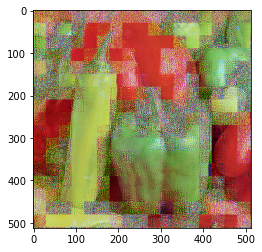

143.6177777764467
Process Reconstruction on (540, 540, 3) image


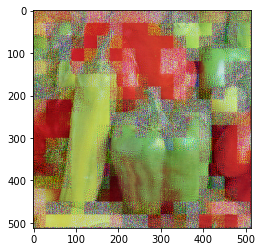

143.73915981386338
Process Reconstruction on (540, 540, 3) image


In [ ]:
#200	2	8	0.01	117.883074
one = 200
two = 2
three = 8
four = 0.01

for i in range(0, 5):
    reconst = filter_reconstruct(img_arr, num_cell=one, cell_size = two, sparse_freq=three, alpha = four, observation = 'V1', mode = 'color')
#     reconst = filter_reconstruct(img_arr, num_cell=50, cell_size = 1, sparse_freq=1, alpha = 0.001, observation = 'V1', mode = 'color')
    error = error_calculation(img_arr, reconst)
    plt.imshow(reconst)
    plt.show()
    print(error)